In [1]:
# Imports dan setup path
import os, sys
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.crypto.keygen import generate_rsa_keys
from src.crypto.encrypt import rsa_encrypt
from src.crypto.decrypt import rsa_decrypt
from src.utils.benchmarks import benchmark_rsa

KEYS_DIR = os.path.join(PROJECT_ROOT, "keys")
PRIVATE_PATH = os.path.join(KEYS_DIR, "private.pem")
PUBLIC_PATH  = os.path.join(KEYS_DIR, "public.pem")
os.makedirs(KEYS_DIR, exist_ok=True)

# Generate RSA key pair
priv_path, pub_path = generate_rsa_keys(2048, PRIVATE_PATH, PUBLIC_PATH)
print("Keys generated:", priv_path, pub_path)

Keys generated: d:\VSCode\cryptography\project\keys\private.pem d:\VSCode\cryptography\project\keys\public.pem


In [2]:
# Benchmark RSA untuk berbagai ukuran pesan
message_sizes = [50, 100, 150, 190]
results = []

for size in message_sizes:
    msg = b'A' * size
    t_enc = benchmark_rsa(rsa_encrypt, msg, pub_path)
    ct = rsa_encrypt(msg, pub_path)
    t_dec = benchmark_rsa(rsa_decrypt, ct, priv_path)
    results.append({
        'message_size_bytes': size,
        'encrypt_time_ms': t_enc,
        'decrypt_time_ms': t_dec
    })

rsa_df = pd.DataFrame(results)
BENCH_DIR = os.path.join(PROJECT_ROOT, 'benchmarks')
os.makedirs(BENCH_DIR, exist_ok=True)
csv_path = os.path.join(BENCH_DIR, 'rsa_time.csv')
rsa_df.to_csv(csv_path, index=False)
rsa_df

,message_size_bytes,encrypt_time_ms,decrypt_time_ms
0,50,6.57866,93.64098
1,100,2.32388,91.36486
2,150,2.86674,98.17650
3,190,2.05998,88.07962


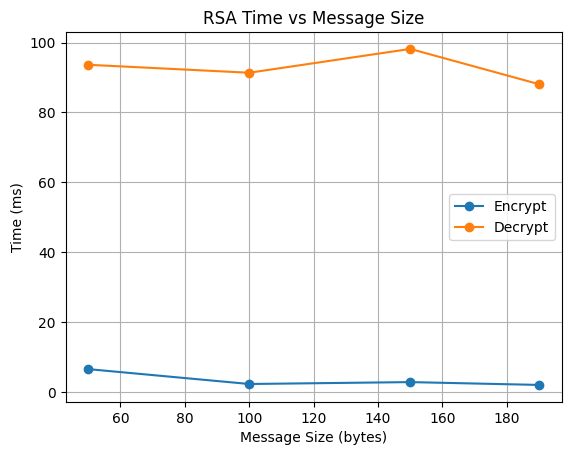

In [3]:
# Visualisasi hasil benchmark
import matplotlib.pyplot as plt
import os

RESULTS_PLOTS_DIR = os.path.join(PROJECT_ROOT, 'results', 'plots')
os.makedirs(RESULTS_PLOTS_DIR, exist_ok=True)

plt.plot(rsa_df['message_size_bytes'], rsa_df['encrypt_time_ms'], marker='o', label='Encrypt')
plt.plot(rsa_df['message_size_bytes'], rsa_df['decrypt_time_ms'], marker='o', label='Decrypt')
plt.title('RSA Time vs Message Size')
plt.xlabel('Message Size (bytes)')
plt.ylabel('Time (ms)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(RESULTS_PLOTS_DIR, 'rsa_time.png'))
plt.show()